In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 
from ast import literal_eval
% matplotlib inline
import warnings

warnings.filterwarnings("ignore")



UsageError: Line magic function `%` not found.


In [3]:
df = pd.read_csv('movies-metadata.csv')

/Users/preethi/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [5]:
df.shape

(45466, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [7]:
# Let's use IMDB's weighted rating
from IPython.display import Image
from IPython.core.display import HTML
Image(url= "https://image.ibb.co/jYWZp9/wr.png")

v = is the number of votes for the movie m= the minimum votes required to be listed in the chart R= average rating of the movie C=mean vote across the whole report

In [8]:
c = df['vote_average'].mean()

In [9]:
m = df['vote_count'].quantile(0.9)

In [10]:
def weighted_rating(x, m=m, c=c):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R)+(m/(v+m) * c)

In [11]:
q_movies = df.copy().loc[df['vote_count'] >=m]

In [12]:
q_movies['score']=q_movies.apply(weighted_rating, axis = 1)
q_movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,score
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,7.640253
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,6.820293
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,5.660700
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,7.537201
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0,5.556626


In [13]:
q_movies_selected = ['budget','genres','title','popularity','production_countries','revenue','runtime','original_language','score']

In [14]:
df_movie = q_movies[q_movies_selected]

In [15]:
df_movie.head()

,budget,genres,title,popularity,production_countries,revenue,runtime,original_language,score
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",Toy Story,21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",373554033.0,81.0,en,7.640253
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Jumanji,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",262797249.0,104.0,en,6.820293
4,0,"[{'id': 35, 'name': 'Comedy'}]",Father of the Bride Part II,8.387519,"[{'iso_3166_1': 'US', 'name': 'United States o...",76578911.0,106.0,en,5.660700
5,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",Heat,17.924927,"[{'iso_3166_1': 'US', 'name': 'United States o...",187436818.0,170.0,en,7.537201
8,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",Sudden Death,5.23158,"[{'iso_3166_1': 'US', 'name': 'United States o...",64350171.0,106.0,en,5.556626


In [16]:
df_movie['genres'].iloc[0]

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

In [17]:
df_movie['production_countries'].iloc[0]

"[{'iso_3166_1': 'US', 'name': 'United States of America'}]"

In [18]:
df_movie['original_language'].iloc[1]

'en'

In [19]:
df_movie.drop(df_movie[df_movie['genres'] == False].index, inplace=True)

/Users/preethi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [20]:
df_movie.isna().sum()

budget                  0
genres                  0
title                   0
popularity              0
production_countries    0
revenue                 0
runtime                 0
original_language       0
score                   0
dtype: int64

In [21]:
def json_to_arr(cell, wanted = "name"): 
    cell = literal_eval(cell)
    if cell == [] or (isinstance(cell, float) and cell.isna()):
        return np.nan
    result = []
    counter = 0
    for element in cell:
        if counter < 3:
            result.append(element[wanted])
            counter += 1
        else:
            break
    return result[:3]

In [22]:
df_movie[['genres']] = df_movie[['genres']].applymap(json_to_arr)


/Users/preethi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [23]:
df_movie[['production_countries']] = df_movie[['production_countries']].applymap(lambda row: 
                                                                     json_to_arr(row,"iso_3166_1"))

In [24]:
df_movie['genres'].iloc[0]

['Animation', 'Comedy', 'Family']

In [25]:
df_movie['production_countries'].iloc[0]

['US']

In [26]:
df_movie['popularity'] = df_movie['popularity'].astype(float)


/var/folders/rp/nxsrxhh5777bbfqjkd5scn3m0000gp/T/ipykernel_67915/236759979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['popularity'] = df_movie['popularity'].astype(float)


In [27]:
df_movie['budget'] = df_movie['budget'].astype(float)

/var/folders/rp/nxsrxhh5777bbfqjkd5scn3m0000gp/T/ipykernel_67915/400669815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['budget'] = df_movie['budget'].astype(float)


In [28]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4555 entries, 0 to 45343
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4555 non-null   float64
 1   genres                4554 non-null   object 
 2   title                 4555 non-null   object 
 3   popularity            4555 non-null   float64
 4   production_countries  4551 non-null   object 
 5   revenue               4555 non-null   float64
 6   runtime               4555 non-null   float64
 7   original_language     4555 non-null   object 
 8   score                 4555 non-null   float64
dtypes: float64(5), object(4)
memory usage: 484.9+ KB


In [29]:
df_movie['profit'] = df_movie['revenue']-df_movie['budget']


/var/folders/rp/nxsrxhh5777bbfqjkd5scn3m0000gp/T/ipykernel_67915/2865516129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['profit'] = df_movie['revenue']-df_movie['budget']


In [30]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4555 entries, 0 to 45343
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4555 non-null   float64
 1   genres                4554 non-null   object 
 2   title                 4555 non-null   object 
 3   popularity            4555 non-null   float64
 4   production_countries  4551 non-null   object 
 5   revenue               4555 non-null   float64
 6   runtime               4555 non-null   float64
 7   original_language     4555 non-null   object 
 8   score                 4555 non-null   float64
 9   profit                4555 non-null   float64
dtypes: float64(6), object(4)
memory usage: 520.5+ KB


In [32]:
df_movie.to_csv('df_movie_master.csv', index = False)

## Exploratory analysis

### 1. Top 10 Movies based on Popularity

In [164]:
sort_value = df_movie.sort_values(by="popularity", ascending=False)
sort_value.head(10)

,budget,genres,title,popularity,production_countries,revenue,runtime,original_language,score,profit
30700,74000000.0,"[Family, Animation, Adventure]",Minions,547.488298,[US],1.156731e+09,91.0,en,6.374415,1.082731e+09
33356,149000000.0,"[Action, Adventure, Fantasy]",Wonder Woman,294.337037,[US],8.205804e+08,141.0,en,7.151189,6.715804e+08
42222,160000000.0,"[Family, Fantasy, Romance]",Beauty and the Beast,287.253654,"[GB, US]",1.262886e+09,129.0,en,6.766769,1.102886e+09
43644,34000000.0,"[Action, Crime]",Baby Driver,228.032744,"[GB, US]",2.245113e+08,113.0,en,7.087166,1.905113e+08
24455,165000000.0,"[Adventure, Family, Animation]",Big Hero 6,213.849907,[US],6.521054e+08,102.0,en,7.745870,4.871054e+08
26564,58000000.0,"[Action, Adventure, Comedy]",Deadpool,187.860492,[US],7.831130e+08,108.0,en,7.375432,7.251130e+08
26566,200000000.0,"[Action, Adventure, Comedy]",Guardians of the Galaxy Vol. 2,185.330992,[US],8.634161e+08,137.0,en,7.536810,6.634161e+08
14551,237000000.0,"[Action, Adventure, Fantasy]",Avatar,185.070892,"[US, GB]",2.787965e+09,162.0,en,7.179380,2.550965e+09
24351,20000000.0,"[Action, Thriller]",John Wick,183.870374,"[CA, CN, US]",8.876166e+07,101.0,en,6.960932,6.876166e+07
23675,61000000.0,"[Mystery, Thriller, Drama]",Gone Girl,154.801009,[US],3.693304e+08,145.0,en,7.840953,3.083304e+08


/Users/preethi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


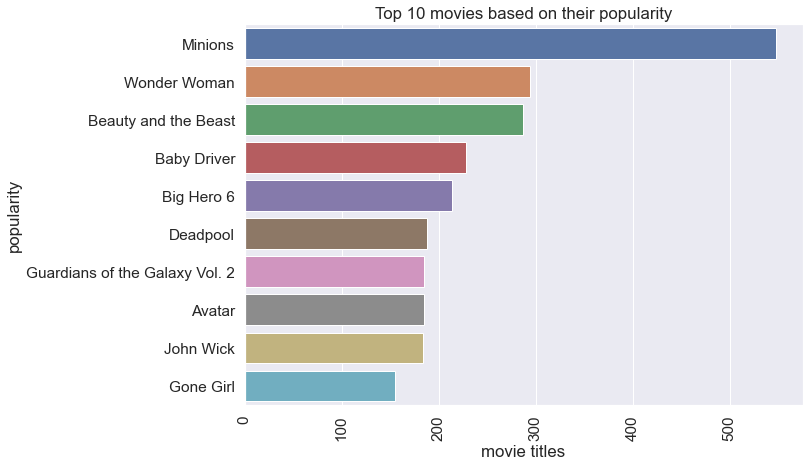

In [166]:
sb.set(rc={'figure.figsize':(10,7)}, font_scale=1.4)


ax = sb.barplot(
     
     df_movie.sort_values(by="popularity", ascending=False).head(10).popularity,
df_movie.sort_values(by="popularity", ascending=False).head(10).title )


#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(90)

ax.set(xlabel='movie titles', ylabel='popularity', title = 'Top 10 movies based on their popularity')
plt.show()

### 2. Top 10 movies based on IMDb score

In [104]:
sort_score = df_movie.sort_values(by="score", ascending=False)
sort_score.head(10)

,budget,genres,title,popularity,production_countries,revenue,runtime,original_language,score
314,25000000.0,"[Drama, Crime]",The Shawshank Redemption,51.645403,[US],2.834147e+07,142.0,en,8.445869
834,6000000.0,"[Drama, Crime]",The Godfather,41.109264,[US],2.450664e+08,175.0,en,8.425439
10309,13200000.0,"[Comedy, Drama, Romance]",Dilwale Dulhania Le Jayenge,34.457024,[IN],1.000000e+08,190.0,hi,8.421453
12481,185000000.0,"[Drama, Action, Crime]",The Dark Knight,123.167259,"[GB, US]",1.004558e+09,152.0,en,8.265477
2843,63000000.0,[Drama],Fight Club,63.869599,"[DE, US]",1.008538e+08,139.0,en,8.256385
292,8000000.0,"[Thriller, Crime]",Pulp Fiction,140.950236,[US],2.139288e+08,154.0,en,8.251406
522,22000000.0,"[Drama, History, War]",Schindler's List,41.725123,[US],3.213656e+08,195.0,en,8.206639
23673,3300000.0,[Drama],Whiplash,64.299990,[US],1.309200e+07,105.0,en,8.205404
5481,15000000.0,"[Fantasy, Adventure, Animation]",Spirited Away,41.048867,[JP],2.749251e+08,125.0,ja,8.196055
2211,20000000.0,"[Comedy, Drama]",Life Is Beautiful,39.394970,[IT],2.294000e+08,116.0,it,8.187171


/Users/preethi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


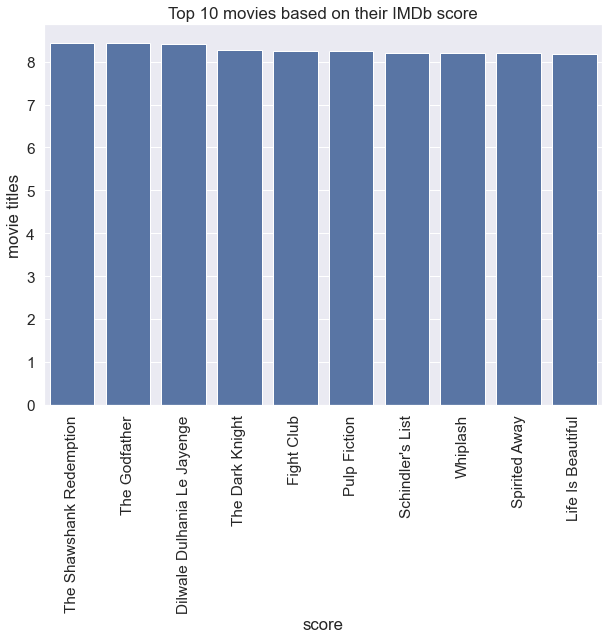

In [171]:
sb.set(rc={'figure.figsize':(10,7)}, font_scale=1.4)

base_color = sb.color_palette()[0]
ax = sb.barplot(df_movie.sort_values(by="score", ascending=False).head(10).title,
      df_movie.sort_values(by="score", ascending=False).head(10).score, color = base_color)
    


#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(90)

ax.set(ylabel='movie titles', xlabel='score', title = 'Top 10 movies based on their IMDb score')
plt.show()

In [106]:
df_movie['profit'] = df_movie['revenue']-df_movie['budget']

/var/folders/rp/nxsrxhh5777bbfqjkd5scn3m0000gp/T/ipykernel_27538/3194259910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['profit'] = df_movie['revenue']-df_movie['budget']


In [107]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4555 entries, 0 to 45343
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4555 non-null   float64
 1   genres                4554 non-null   object 
 2   title                 4555 non-null   object 
 3   popularity            4555 non-null   float64
 4   production_countries  4551 non-null   object 
 5   revenue               4555 non-null   float64
 6   runtime               4555 non-null   float64
 7   original_language     4555 non-null   object 
 8   score                 4555 non-null   float64
 9   profit                4555 non-null   float64
dtypes: float64(6), object(4)
memory usage: 520.5+ KB


In [108]:
import pprint
#defining the function
def calculate(column):
    #for highest earned profit
    high= df_movie[column].idxmax()
    high_details=pd.DataFrame(df_movie.loc[high])
    
    #for lowest earned profit
    low= df_movie[column].idxmin()
    low_details=pd.DataFrame(df_movie.loc[low])
    
    #collectin data in one place
    info=pd.concat([high_details, low_details], axis=1)
    
    return info

#calling the function
calculate('profit')
    

,14551,21175
budget,237000000.0,255000000.0
genres,"[Action, Adventure, Fantasy]","[Action, Adventure, Western]"
title,Avatar,The Lone Ranger
popularity,185.070892,12.729104
production_countries,"[US, GB]",[US]
revenue,2787965087.0,89289910.0
runtime,162.0,149.0
original_language,en,en
score,7.17938,5.882115
profit,2550965087.0,-165710090.0


In [109]:
calculate('budget')

,17124,4
budget,380000000.0,0.0
genres,"[Adventure, Action, Fantasy]",[Comedy]
title,Pirates of the Caribbean: On Stranger Tides,Father of the Bride Part II
popularity,27.88772,8.387519
production_countries,[US],[US]
revenue,1045713802.0,76578911.0
runtime,136.0,106.0
original_language,en,en
score,6.376074,5.6607
profit,665713802.0,76578911.0


In [110]:
calculate('revenue')

,14551,11
budget,237000000.0,0.0
genres,"[Action, Adventure, Fantasy]","[Comedy, Horror]"
title,Avatar,Dracula: Dead and Loving It
popularity,185.070892,5.430331
production_countries,"[US, GB]","[FR, US]"
revenue,2787965087.0,0.0
runtime,162.0,88.0
original_language,en,en
score,7.17938,5.66463
profit,2550965087.0,0.0


### 3. Top 10 movies based on profit

In [111]:
sorted_profit = df_movie.sort_values(by="profit", ascending=False).head(10)
sorted_profit

,budget,genres,title,popularity,production_countries,revenue,runtime,original_language,score,profit
14551,237000000.0,"[Action, Adventure, Fantasy]",Avatar,185.070892,"[US, GB]",2.787965e+09,162.0,en,7.179380,2.550965e+09
26555,245000000.0,"[Action, Adventure, Science Fiction]",Star Wars: The Force Awakens,31.626013,[US],2.068224e+09,136.0,en,7.463070,1.823224e+09
1639,200000000.0,"[Drama, Romance, Thriller]",Titanic,26.889070,[US],1.845034e+09,194.0,en,7.462032,1.645034e+09
25084,150000000.0,"[Action, Adventure, Science Fiction]",Jurassic World,32.790475,[US],1.513529e+09,124.0,en,6.484327,1.363529e+09
28830,190000000.0,[Action],Furious 7,27.275687,"[JP, US]",1.506249e+09,137.0,en,7.239024,1.316249e+09
17818,220000000.0,"[Science Fiction, Action, Adventure]",The Avengers,89.887648,[US],1.519558e+09,143.0,en,7.376555,1.299558e+09
17437,125000000.0,"[Family, Fantasy, Adventure]",Harry Potter and the Deathly Hallows: Part 2,24.990737,"[GB, US]",1.342000e+09,130.0,en,7.842059,1.217000e+09
26558,280000000.0,"[Action, Adventure, Science Fiction]",Avengers: Age of Ultron,37.379420,[US],1.405404e+09,141.0,en,7.261929,1.125404e+09
22110,150000000.0,"[Animation, Adventure, Family]",Frozen,24.248243,[US],1.274219e+09,102.0,en,7.251949,1.124219e+09
42222,160000000.0,"[Family, Fantasy, Romance]",Beauty and the Beast,287.253654,"[GB, US]",1.262886e+09,129.0,en,6.766769,1.102886e+09


/Users/preethi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


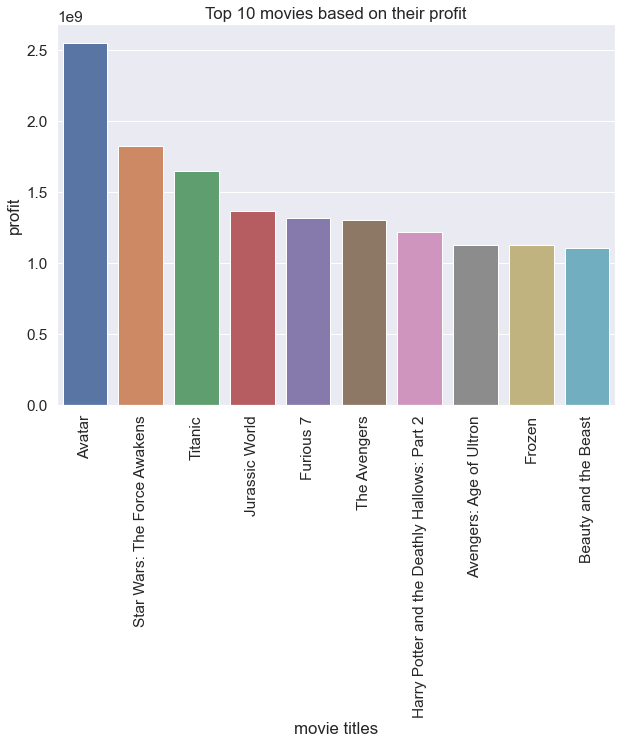

In [112]:
sb.set(rc={'figure.figsize':(10,7)}, font_scale=1.4)


ax = sb.barplot(
     df_movie.sort_values(by="profit", ascending=False).head(10).title, 
     df_movie.sort_values(by="profit", ascending=False).head(10).profit)


#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(90)

ax.set(xlabel='movie titles', ylabel='profit', title = 'Top 10 movies based on their profit')
plt.show()

### 4. Top 10 Movie Genres

In [34]:
df_movie['genres'].value_counts()[:10]



TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Comedy]                    314
[Drama]                     260
[Drama, Romance]            116
[Comedy, Romance]           104
[Horror, Thriller]          101
[Comedy, Drama]              96
[Comedy, Drama, Romance]     84
[Horror]                     62
[Crime, Drama, Thriller]     60
[Drama, Thriller]            57
Name: genres, dtype: int64

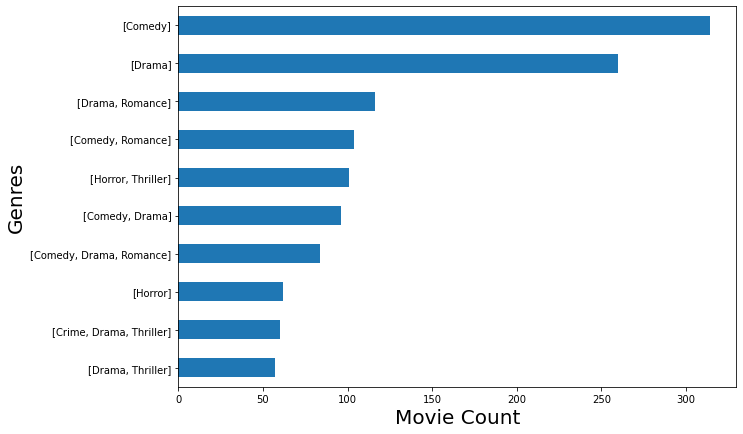

In [36]:
df_movie['genres'].value_counts()[:10].sort_values().plot(kind= 'barh',figsize = (10,7))

plt.xlabel('Movie Count', fontsize = 20)
plt.ylabel('Genres', fontsize = 20);



### 5. Top 5 languages

In [40]:
sorted_counts = df_movie['original_language'].value_counts().head(5)
sorted_counts

en    4077
fr     177
ja      65
it      56
es      38
Name: original_language, dtype: int64

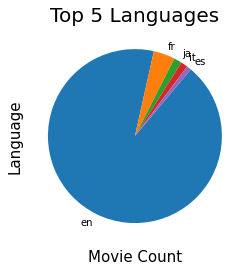

In [43]:
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 50, counterclock = False)

plt.title('Top 5 Languages',fontsize = 20)
plt.xlabel('Movie Count', fontsize = 15)
plt.ylabel('Language', fontsize = 15);




### 6. Most Profitable Movie Language

/Users/preethi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


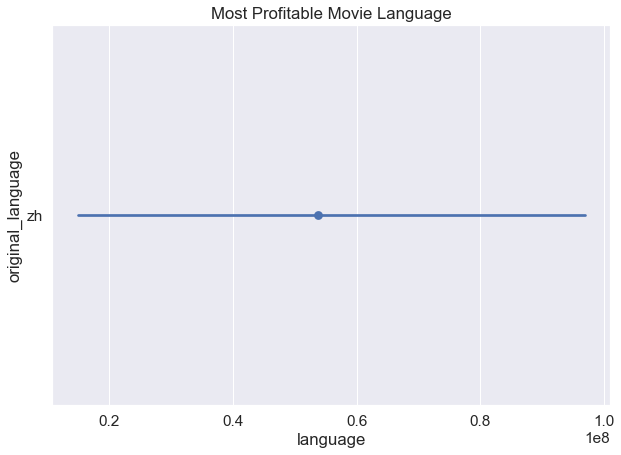

In [183]:
sb.pointplot(df_movie.sort_values(by="original_language", ascending=False).head(10).profit, 
     df_movie.sort_values(by="original_language", ascending=False).head(10).original_language)
plt.xlabel('language')
plt.title('Most Profitable Movie Language');

### 7.Top 10 Movie Language Based on Popularity And IMDb Score

[Text(0, 0.5, 'Rating'),
 Text(0.5, 1.0, 'Top 10 Movie Language Based on Popularity And IMDb Score')]

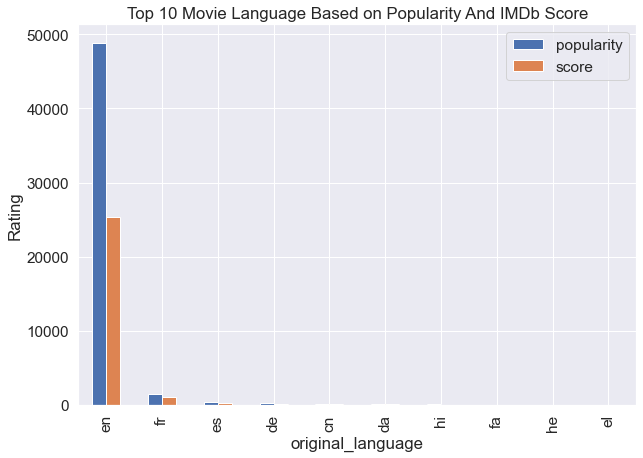

In [192]:
f,ax=plt.subplots(figsize=(10, 7))
df_movie[['original_language', 'popularity','score']].groupby(['original_language']).sum()[:10].sort_values(["score"], ascending=False).plot(kind="bar",  ax=ax);
ax.set(ylabel = 'Rating', title = 'Top 10 Movie Language Based on Popularity And IMDb Score')

### 8. Relationship Between Profit, Popularity and IMDb score

In [44]:
df = df_movie[['profit','popularity', 'score','runtime']]

sb.set(rc={'figure.figsize':(15,15)}, font_scale=1.3, style="ticks")

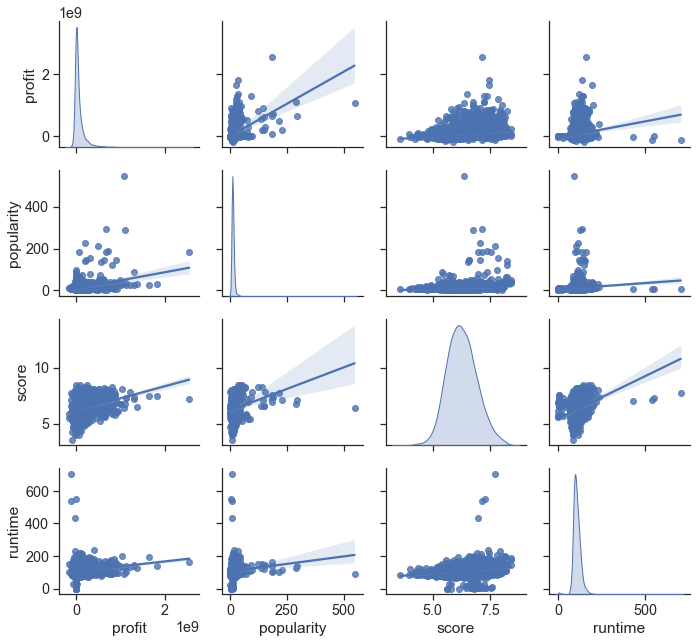

In [47]:
f1 = sb.pairplot(df, kind="reg", diag_kind="kde", diag_kws=dict(shade=True))

f1.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

<AxesSubplot:>

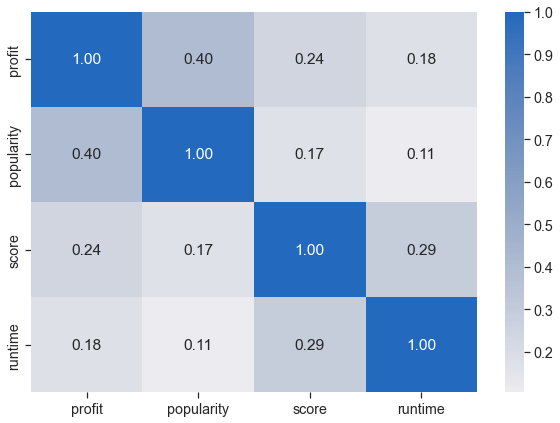

In [46]:
# correlation plot 
plt.figure(figsize=[10,7]);
#  select the Numerical variables 
df = df_movie[['profit','popularity', 'score','runtime']]

# Use cmap to reverse the color map. 
sb.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)


### 9.Top 5 Movies Based on Popularity and IMDb score

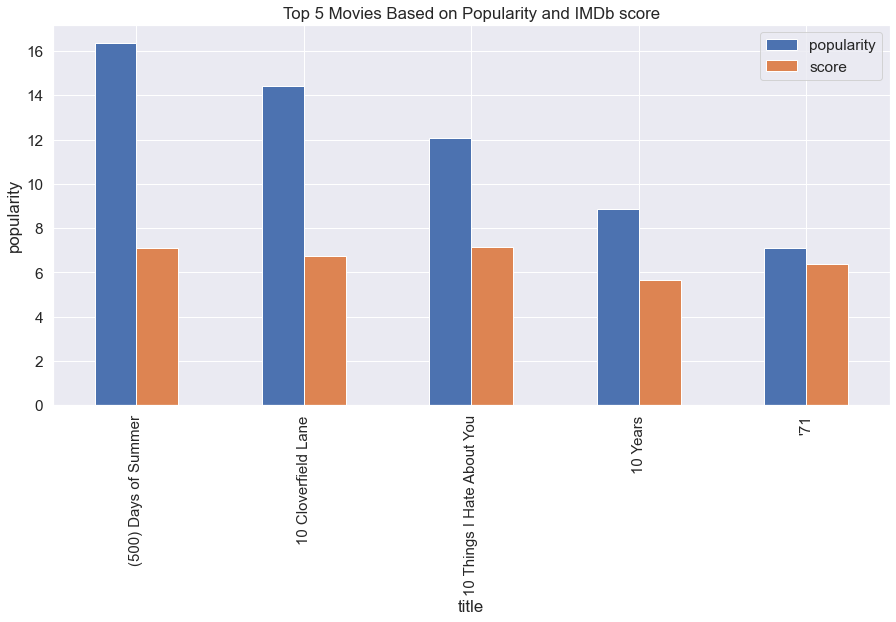

In [157]:
f,ax=plt.subplots(figsize=(15, 7))
df_movie[['title', 'popularity', 'score']].groupby(['title']).sum()[:5].sort_values(["popularity"], ascending=False).plot(kind="bar",  ax=ax);
plt.xticks(rotation=90,fontsize=15)

ax.set(ylabel = 'popularity', title = 'Top 5 Movies Based on Popularity and IMDb score')

plt.show()

In [48]:
df_movie[['title', 'popularity', 'score']].groupby(['title']).sum()[:5].sort_values(["popularity"], ascending=False)


,popularity,score
title,,
(500) Days of Summer,16.376657,7.119731
10 Cloverfield Lane,14.421528,6.729890
10 Things I Hate About You,12.069966,7.160432
10 Years,8.881954,5.659231
'71,7.080550,6.398455
